In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 任务1：报名比赛，下载比赛数据集并完成读取

In [3]:
train_df = pd.read_csv(r'./train_set/train_set.csv',sep='\t')

In [4]:
train_df.head()

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...


In [5]:
train_df.shape

(200000, 2)

In [6]:
train_df['word'] = train_df['text'].apply(lambda x: len(x.split(' ')))

In [7]:
train_df.head(10)

,label,text,word
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...,1057
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...,486
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...,764
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...,1570
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...,307
5,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...,1050
6,3,307 4780 6811 1580 7539 5886 5486 3433 6644 58...,267
7,10,26 4270 1866 5977 3523 3764 4464 3659 4853 517...,876
8,12,2708 2218 5915 4559 886 1241 4819 314 4261 166...,314
9,3,3654 531 1348 29 4553 6722 1474 5099 7541 307 ...,1086


# 任务2：对数据集字符进行可视化，统计标签和字符分布

## 统计数据集中所有句子所包含字符的平均个数

In [8]:
train_df['word'].sum() / train_df.shape[0]

907.20711

## 统计数据集中不同类别下句子平均字符的个数

In [9]:
train_df.groupby('label')['word'].sum() / train_df.groupby('label')['text'].count()

label
0      878.717663
1      870.363676
2     1014.429562
3      784.774726
4      649.705647
5     1116.054938
6     1249.114071
7     1157.883271
8      712.401172
9      833.627084
10     911.138008
11     608.889812
12    1194.969248
13     735.325991
dtype: float64

## 统计数据集中类别分布的规律

In [10]:
train_df['label'].value_counts()

0     38918
1     36945
2     31425
3     22133
4     15016
5     12232
6      9985
7      8841
8      7847
9      5878
10     4920
11     3131
12     1821
13      908
Name: label, dtype: int64

Text(0.5, 0, 'category')

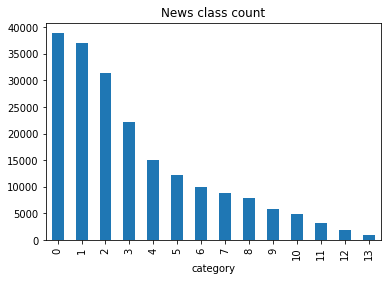

In [11]:
train_df['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

## 统计数据集中不同类别下句子中最常见的5个字符

In [17]:
import collections

In [51]:
def concat_func(x) :
    return pd.Series({'label_text' : ' '.join(x['text'])})

In [53]:
df_top5 = pd.DataFrame(train_df[['label','text']].groupby('label').apply(lambda x : concat_func(x)).reset_index())
df_top5

,label,label_text
0,0,3659 3659 1903 1866 4326 4744 7239 3479 4261 4...
1,1,4412 5988 5036 4216 7539 5644 1906 2380 2252 6...
2,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
3,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
4,4,3772 4269 3433 6122 2035 4531 465 6565 498 358...
5,5,2827 2444 7399 3528 2260 6127 1871 119 3615 57...
6,6,5284 1779 2109 6248 7039 5677 1816 5430 3154 1...
7,7,6469 1066 1623 1018 3694 4089 3809 4516 6656 3...
8,8,2087 730 5166 3300 7539 1722 5305 913 4326 669...
9,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 4...


In [76]:
def get_top5(x,top_n=5):
    label_dict = dict(collections.Counter(x.split(' ')))
    label_dict_list = sorted(label_dict.items(), key = lambda kv : kv[1],reverse = True)
    top5_list = [(k,v) for k,v in label_dict_list][:top_n]
    return top5_list


In [77]:
# pd.set_option('max_colwidth',100)
df_top5['top5_word'] = df_top5['label_text'].apply(lambda x : get_top5(x))
df_top5

,label,label_text,top5_word
0,0,3659 3659 1903 1866 4326 4744 7239 3479 4261 4630 4270 7539 4811 465 3500 5474 5393 6038 4231 56...,"[(3750, 1267331), (648, 967653), (900, 577742), (3370, 503768), (4464, 307431)]"
1,1,4412 5988 5036 4216 7539 5644 1906 2380 2252 6637 5702 2465 3223 2106 4576 2252 2770 23 2029 240...,"[(3750, 1200686), (648, 714152), (3370, 626708), (900, 542884), (4464, 445525)]"
2,2,2967 6758 339 2021 1854 3731 4109 3792 4149 1519 2058 3912 2465 2410 1219 6654 7539 264 2456 481...,"[(3750, 1458331), (648, 974639), (900, 618294), (7399, 351894), (6122, 343850)]"
3,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6301 2465 6088 5858 4333 1386 1401 5780 290 541 635...,"[(3750, 774668), (648, 494477), (900, 298663), (6122, 187933), (4939, 173606)]"
4,4,3772 4269 3433 6122 2035 4531 465 6565 498 3585 6093 1706 5854 4893 442 2522 2400 7495 4559 1324...,"[(3750, 360839), (648, 231863), (900, 190842), (4411, 120442), (7399, 86190)]"
5,5,2827 2444 7399 3528 2260 6127 1871 119 3615 5744 1695 5526 5566 4781 5099 299 2192 119 5612 4499...,"[(3750, 715740), (648, 329051), (900, 305241), (6122, 159125), (5598, 136713)]"
6,6,5284 1779 2109 6248 7039 5677 1816 5430 3154 101 1567 3607 6235 6248 5620 5999 531 3750 5284 210...,"[(3750, 469540), (648, 345372), (900, 222488), (6248, 193757), (2555, 175234)]"
7,7,6469 1066 1623 1018 3694 4089 3809 4516 6656 3659 3370 3370 2799 3370 3700 1519 4480 5589 1667 2...,"[(3750, 428638), (648, 262220), (900, 184131), (3370, 159156), (5296, 132136)]"
8,8,2087 730 5166 3300 7539 1722 5305 913 4326 669 5393 340 5235 6333 4354 1277 4430 1401 4853 3750 ...,"[(3750, 242367), (648, 202399), (900, 92207), (6122, 57345), (4939, 56147)]"
9,9,3819 4525 1129 6725 6485 2109 3800 5264 1006 462 6542 6101 1844 6485 2786 433 2465 3659 3370 446...,"[(3750, 178783), (648, 157291), (900, 70680), (7328, 46477), (6122, 43411)]"


In [81]:
df_top5[['label','top5_word']]

,label,top5_word
0,0,"[(3750, 1267331), (648, 967653), (900, 577742), (3370, 503768), (4464, 307431)]"
1,1,"[(3750, 1200686), (648, 714152), (3370, 626708), (900, 542884), (4464, 445525)]"
2,2,"[(3750, 1458331), (648, 974639), (900, 618294), (7399, 351894), (6122, 343850)]"
3,3,"[(3750, 774668), (648, 494477), (900, 298663), (6122, 187933), (4939, 173606)]"
4,4,"[(3750, 360839), (648, 231863), (900, 190842), (4411, 120442), (7399, 86190)]"
5,5,"[(3750, 715740), (648, 329051), (900, 305241), (6122, 159125), (5598, 136713)]"
6,6,"[(3750, 469540), (648, 345372), (900, 222488), (6248, 193757), (2555, 175234)]"
7,7,"[(3750, 428638), (648, 262220), (900, 184131), (3370, 159156), (5296, 132136)]"
8,8,"[(3750, 242367), (648, 202399), (900, 92207), (6122, 57345), (4939, 56147)]"
9,9,"[(3750, 178783), (648, 157291), (900, 70680), (7328, 46477), (6122, 43411)]"
